In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [6]:
x,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                       n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=20)

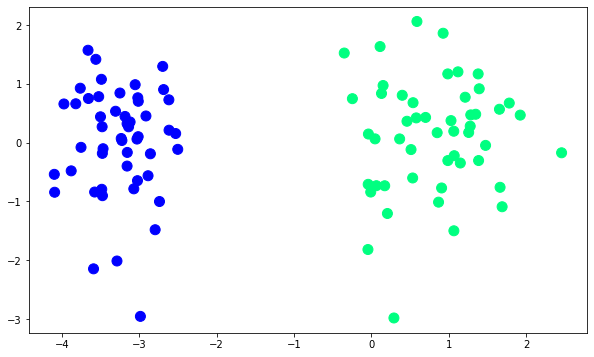

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)

In [8]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression(penalty='none',solver='sag')
lor.fit(x,y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [9]:
print(lor.coef_)
print(lor.intercept_)

[[4.81230469 0.20237175]]
[5.79791578]


In [10]:
m1=-(lor.coef_[0][0]/lor.coef_[0][1])
b1=-(lor.intercept_/lor.coef_[0][1])

In [11]:
x_input=np.linspace(-3,3,100)
y_input=m1*x_input+b1

In [47]:
def gd(x,y):
    x=np.insert(x,0,1,axis=1)
    weights=np.ones(x.shape[1])
    lr=0.1
    for i in range(3000):
        y_hat=sigmoid(np.dot(x,weights))
        weights=weights+lr*(np.dot((y-y_hat),x)/x.shape[0])
    return weights[1:],weights[0]

In [48]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [49]:
coef,intercept=gd(x,y)

In [50]:
m=-(coef[0]/coef[1])
b=-(intercept/coef[1])

In [51]:
x_input_1=np.linspace(-3,3,100)
y_input_1=m*x_input_1+b

(-3.0, 2.0)

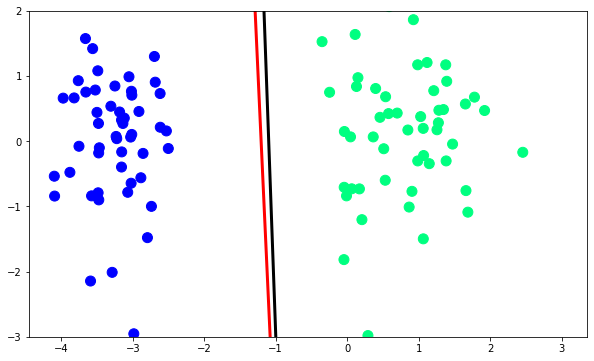

In [52]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input_1,y_input_1,color='black',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)